# Writing Structured Programs #

https://www.nltk.org/book/ch04.html

## Assignment ##

In [1]:
nested = [[]] * 3
nested[1].append('Python')
nested[1] = ['Monty']
nested

[['Python'], ['Monty'], ['Python']]

In [4]:
import random
size = 5
python = ['Python']
snake_nest = [python] * size
position = random.choice(range(size))
snake_nest[position] = ['Python']
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [5]:
[id(snake) for snake in snake_nest]

[4383536072, 4383536072, 4383536072, 4383537352, 4383536072]

## Conditionals ##

In [6]:
mixed = ['cat', '', ['dog'], []]
for element in mixed:
    if element:
        print(element)

cat
['dog']


In [8]:
animals = ['cat', 'dog']
if 'cat' in animals:
    print(1)
elif 'dog' in animals:
    print(2)

1


In [9]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
all(len(w) > 4 for w in sent)

False

In [10]:
any(len(w) > 4 for w in sent)

True

## Sequences ##

In [12]:
t = 'walk', 'fem', 3 
t

('walk', 'fem', 3)

In [13]:
t[1:]

('fem', 3)

In [14]:
raw = 'I turned off the spectroroute'
text = ['I', 'turned', 'off', 'the', 'spectroroute']
pair = (6, 'turned')
raw[2], text[3], pair[1]

('t', 'the', 'turned')

In [15]:
raw[-3:], text[-3:], pair[-3:]

('ute', ['off', 'the', 'spectroroute'], (6, 'turned'))

In [16]:
len(raw), len(text), len(pair)

(29, 5, 2)

|Python Expression|Comment|
|----|----|
|for item in s|iterate over the items of s|
|for item in sorted(s)|iterate over the items of s in order|
|for item in set(s)|iterate over unique elements of s|
|for item in reversed(s)|iterate over elements of s in reverse|
|for item in set(s).difference(t)|iterate over elements of s not in t|

In [19]:
from nltk.tokenize import word_tokenize
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = word_tokenize(raw)
fdist = nltk.FreqDist(text)
sorted(fdist)

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [20]:
for key in fdist:
    print(key + ':', fdist[key], end='; ')

Red: 1; lorry: 4; ,: 3; yellow: 2; red: 1; .: 1; 

In [21]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
zip(words, tags)

In [22]:
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [23]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

For some NLP tasks it is necessary to cut up a sequence into two or more parts. For instance, we might want to "train" a system on 90% of the data and test it on the remaining 10%. To do this we decide the location where we want to cut the data , then cut the sequence at that location.

In [24]:
text = nltk.corpus.nps_chat.words()

In [25]:
cut = int(0.9 * len(text))

In [26]:
training_data, test_data = text[:cut], text[cut:]

In [27]:
text == training_data + test_data

True

In [28]:
len(training_data) / len(test_data)

9.0

## Combining Different Sequence Types ##

In [1]:
 words = 'I turned off the spectroroute'.split()

In [4]:
wordlens = [(len(word), word) for word in words]
wordlens

[(1, 'I'), (6, 'turned'), (3, 'off'), (3, 'the'), (12, 'spectroroute')]

In [3]:
wordlens.sort()
' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

In [5]:
lexicon = [('the', 'det', ['Di:', 'D@']),('off', 'prep', ['Qf', 'O:f'])]

In [6]:
lexicon.sort()

In [7]:
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])

In [8]:
del lexicon[0]

### Generator Expressions ###

In [12]:
import nltk
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
... "it means just what I choose it to mean - neither more nor less."'''
[w.lower() for w in nltk.word_tokenize(text)]

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 '...',
 '``',
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''"]

In [14]:
max([w.lower() for w in nltk.word_tokenize(text)])

'word'

In [16]:
max(w.lower() for w in nltk.word_tokenize(text))

'word'

### Questions of Style ###
**Procedural vs Declarative Style**

In [18]:
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)
total / count

4.401545438271973

In [19]:
total = sum(len(t) for t in tokens)
print(total / len(tokens))

4.401545438271973


In [21]:
word_list = sorted(set(tokens))

In [22]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


In [23]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
    if len(word) > len(longest):
        longest = word

longest

'unextinguishable'

In [24]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

**Some Legitimate Uses for Counters**

In [25]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [29]:
nltk.bigrams(text)

<generator object bigrams at 0x1a1ca701b0>

In [30]:
nltk.trigrams(text)

<generator object trigrams at 0x1a1ca70228>

In [31]:
nltk.ngrams(text, n)

<generator object ngrams at 0x1a1ca702a0>

**Functions: The Foundation of Structured Programming**

In [34]:
import re
def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [35]:
help(get_text)

Help on function get_text in module __main__:

get_text(file)
    Read text from a file, normalizing whitespace and stripping HTML markup.



**Checking Parameter Types**

In [37]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

In [38]:
tag(["'Tis", 'but', 'a', 'scratch'])

'noun'

In [47]:
def tag(word):
    assert isinstance(word, list), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

In [48]:
tag(["'Tis", 'but', 'a', 'scratch'])

'noun'

**Functional Decomposition**

In [54]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html, 'html.parser').get_text()
    for word in nltk.word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

In [55]:
constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
fd = nltk.FreqDist()
freq_words(constitution, fd, 30)

["''", ',', ':', ':1', 'the', ';', '(', ')', '``', '{', '}', 'of', '?', 'url', 'https', '@', 'import', 'q8ad82', "'", 'archives', '#', 'and', '.', '[', ']', 'national', 'a', 'documents', 'founding', 'to']


**Documenting Functions**

In [56]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

### Doing More with Functions ###

**Functions as Arguments**

In [57]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

In [58]:
def extract_property(prop):
    return [prop(word) for word in sent]

In [59]:
extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [60]:
def last_letter(word):
    return word[-1]

In [61]:
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [62]:
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [63]:
sorted(sent)

[',',
 '.',
 'Take',
 'and',
 'care',
 'care',
 'of',
 'of',
 'sense',
 'sounds',
 'take',
 'the',
 'the',
 'themselves',
 'will']

**Accumulative Functions**

In [65]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

In [66]:
for item in search1('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [67]:
for item in search2('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [68]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]

In [69]:
list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

**Higher-Order Functions**

In [70]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']

In [71]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the','sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

In [72]:
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [73]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [74]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))

In [75]:
sum(lengths) / len(lengths)

21.75081116158339

In [76]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]

In [77]:
sum(lengths) / len(lengths)

21.75081116158339

**Named Arguments**

In [81]:
def repeat(msg='<empty>', num=1):
    return msg * num

In [82]:
repeat(num=3)

'<empty><empty><empty>'

In [83]:
repeat(msg='Alice')

'Alice'

In [84]:
repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

In [85]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)

In [86]:
generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [87]:
song = [['four', 'calling', 'birds'],['three', 'French', 'hens'],['two', 'turtle', 'doves']]
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [88]:
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [89]:
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = word_tokenize(text)
    freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.most_common(num)

In [91]:
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = FreqDist()
    if verbose: print("Opening", file)
    text = open(file).read()
    if verbose: print("Read in %d characters" % len(file))
    for word in word_tokenize(text):
        if len(word) >= min:
            freqdist[word] += 1
            if verbose and freqdist.N() % 100 == 0: print(".", sep="")
    if verbose: print
    return freqdist.most_common(num)

In [93]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat']

In [94]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur'])

['ur', 'on']

In [95]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']

## Debugging Techniques ##

In [99]:
import pdb
find_words(['cat'], 3)


['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat']

In [100]:
pdb.run("find_words(['dog'], 3)")

> <string>(1)<module>()
(Pdb) step
--Call--
> <ipython-input-93-78b138c17277>(1)find_words()
-> def find_words(text, wordlength, result=[]):
(Pdb) args
text = ['dog']
wordlength = 3
result = ['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat']
(Pdb) exit


**Recursion**

In [101]:
def factorial1(n):
    result = 1
    for i in range(n):
        result *= (i+1)
    return result

In [102]:
def factorial2(n):
    if n == 1:
        return 1
    else:
        return n * factorial2(n-1)

In [103]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

In [104]:
 def size2(s):
    layer = [s] 
    total = 0
    while layer:
        total += len(layer) 
        layer = [h for c in layer for h in c.hyponyms()]
    return total

In [105]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
size1(dog)

190

In [106]:
size2(dog)

190

In [107]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [108]:
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
trie = dict(trie)               # for nicer printing
trie['c']['h']['a']['t']['value']

'cat'

In [110]:
import pprint
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


**Space-Time Tradeoffs**

In [111]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     # use raw_input() in Python 2
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

Building Index...
query> quit
s funded by her mother . lucy quit working professionally 10
erick . i disliked that movie quite a bit , but since " prac
t disaster . babe ruth didn't quit baseball after one season
o-be fiance . i think she can quit that job and get a more r
 and rose mcgowan should just quit acting . she has no chari
and get a day job . and don't quit it .                     
 kubrick , alas , should have quit while he was ahead . this
everyone involved should have quit while they were still ahe
l die . so what does joe do ? quit his job , of course ! ! w
red " implant . he's ready to quit the biz and get a portion
hat he always recorded , they quit and become disillusioned 
 admit that i ? ? ? ve become quite the " scream " fan . no 
 again , the fact that he has quit his job to feel what it's
school reunion . he has since quit his job as a travel journ
ells one of his friends , " i quit school because i didn't l
ms , cursing off the boss and quitting his job ( " toda

In [112]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

In [114]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size 
setup_set = "import random; vocab = set(range(%d))" % vocab_size 
statement = "random.randint(0, %d) in vocab" % (vocab_size * 2)
print(Timer(statement, setup_list).timeit(1000))

0.0029593479994218796


In [115]:
print(Timer(statement, setup_set).timeit(1000))

0.001562788002047455


**Dynamic Programming**

In [117]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l

In [118]:
virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [119]:
virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [120]:
virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [121]:
virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

## A Sample of Python Libraries ##

In [122]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

In [123]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
              (genre, word)
              for genre in genres
              for word in nltk.corpus.brown.words(categories=genre)
              if word in modals)

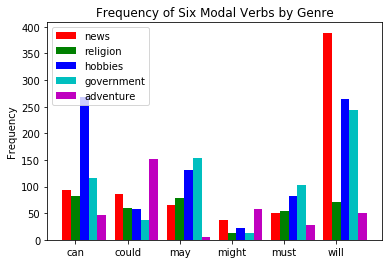

In [124]:
counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]

bar_chart(genres, modals, counts)

In [126]:
from matplotlib import use, pyplot
use('Agg')
pyplot.savefig('modals.png') 
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


<Figure size 432x288 with 0 Axes>

**NetworkX**

In [130]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph() 
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw_graphviz(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

In [ ]:
dog = wn.synset('dog.n.02')
graph = hyponym_graph(dog)
draw(graph)

**csv**

In [ ]:
import csv
input_file = open("lexicon.csv", "rb")
for row in csv.reader(input_file):
    print(row)

**NumPy**

In [134]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
                   [[3,3,3], [4,4,4], [5,5,5]],
                  [[6,6,6], [7,7,7], [8,8,8]] ])
cube[1,1,1]

4

In [135]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [136]:
cube[2,1:]

array([[7, 7, 7],
       [8, 8, 8]])

In [137]:
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [138]:
s

array([6.32455532, 3.16227766])

In [139]:
vt

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])